In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("SICK.txt", sep="\t")
df = df[["sentence_A", "sentence_B", "entailment_label"]]
print("原始資料形狀:", df.shape)

df["entailment_label"] = df["entailment_label"].str.lower()
label2id = {"contradiction": 0, "entailment": 1, "neutral": 2}
df["label_id"] = df["entailment_label"].map(label2id)

df["text"] = df["sentence_A"] + " " + df["sentence_B"]

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["label_id"], random_state=42
)
print("訓練集形狀:", train_df.shape, "測試集形狀:", test_df.shape)

原始資料形狀: (9840, 3)
訓練集形狀: (7872, 5) 測試集形狀: (1968, 5)


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_df["text"])

X_train_full = vectorizer.transform(train_df["text"])  # 訓練特徵
X_test = vectorizer.transform(test_df["text"])           # 測試特徵

y_train_full = train_df["label_id"].values
y_test = test_df["label_id"].values


使用訓練資料數量: 20 筆
Test Accuracy: 0.4253
Classification Report:
               precision    recall  f1-score   support

contradiction       0.21      0.32      0.26       285
   entailment       0.29      0.25      0.27       564
      neutral       0.58      0.54      0.56      1119

     accuracy                           0.43      1968
    macro avg       0.36      0.37      0.36      1968
 weighted avg       0.44      0.43      0.43      1968

Confusion Matrix:
[[ 92  63 130]
 [112 140 312]
 [227 287 605]]


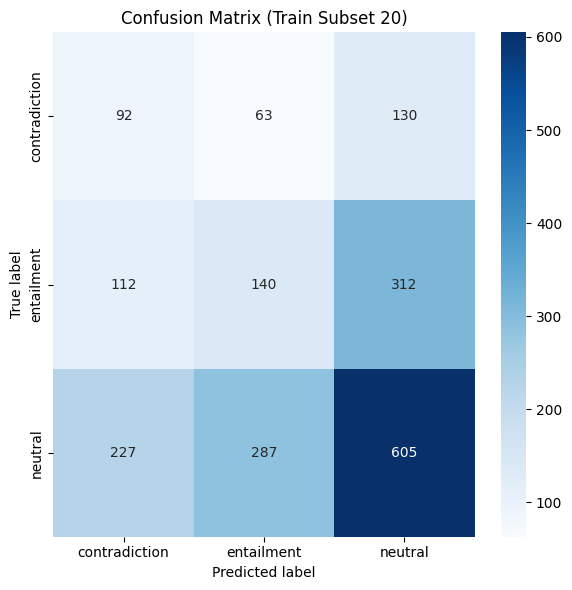


使用訓練資料數量: 50 筆
Test Accuracy: 0.4126
Classification Report:
               precision    recall  f1-score   support

contradiction       0.16      0.19      0.17       285
   entailment       0.28      0.28      0.28       564
      neutral       0.56      0.54      0.55      1119

     accuracy                           0.41      1968
    macro avg       0.33      0.33      0.33      1968
 weighted avg       0.42      0.41      0.42      1968

Confusion Matrix:
[[ 53  76 156]
 [ 91 156 317]
 [189 327 603]]


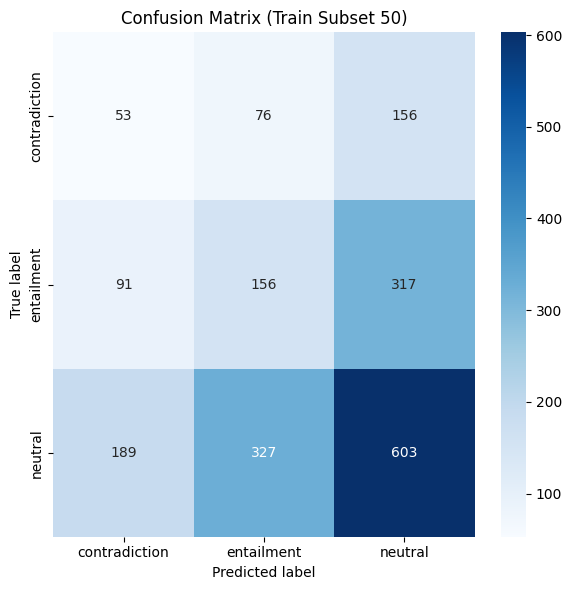


使用訓練資料數量: 70 筆
Test Accuracy: 0.4278
Classification Report:
               precision    recall  f1-score   support

contradiction       0.17      0.20      0.19       285
   entailment       0.28      0.24      0.26       564
      neutral       0.57      0.58      0.57      1119

     accuracy                           0.43      1968
    macro avg       0.34      0.34      0.34      1968
 weighted avg       0.43      0.43      0.43      1968

Confusion Matrix:
[[ 58  69 158]
 [ 87 138 339]
 [189 284 646]]


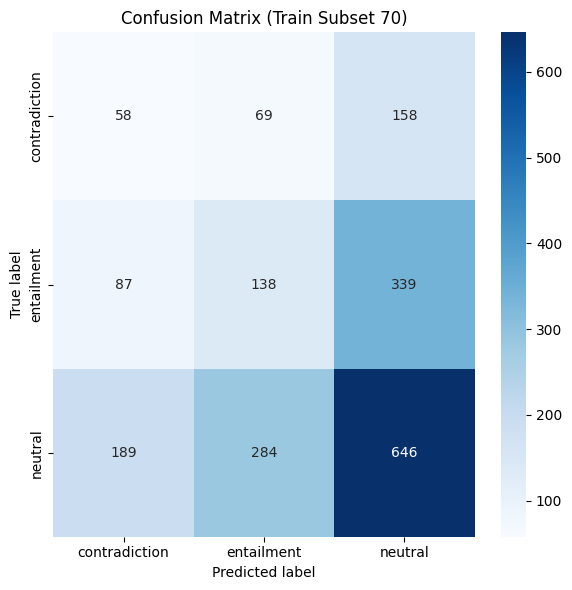


使用訓練資料數量: 100 筆
Test Accuracy: 0.4395
Classification Report:
               precision    recall  f1-score   support

contradiction       0.16      0.17      0.16       285
   entailment       0.30      0.24      0.27       564
      neutral       0.57      0.61      0.59      1119

     accuracy                           0.44      1968
    macro avg       0.34      0.34      0.34      1968
 weighted avg       0.43      0.44      0.43      1968

Confusion Matrix:
[[ 49  64 172]
 [ 84 136 344]
 [183 256 680]]


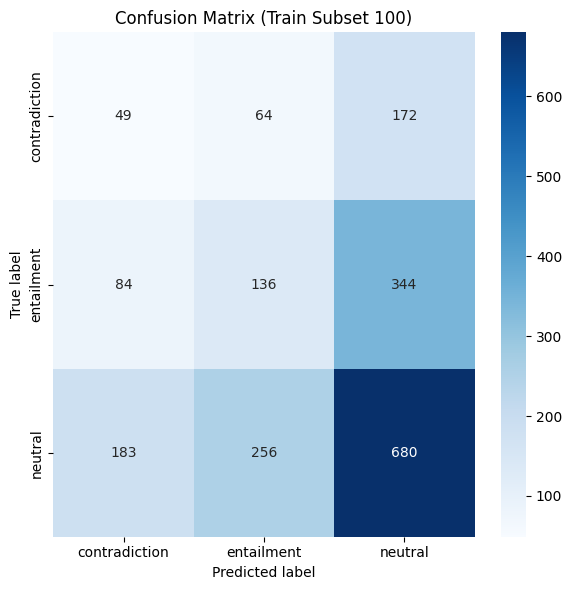


使用訓練資料數量: 300 筆
Test Accuracy: 0.4004
Classification Report:
               precision    recall  f1-score   support

contradiction       0.17      0.22      0.19       285
   entailment       0.25      0.20      0.22       564
      neutral       0.54      0.55      0.54      1119

     accuracy                           0.40      1968
    macro avg       0.32      0.32      0.32      1968
 weighted avg       0.40      0.40      0.40      1968

Confusion Matrix:
[[ 64  58 163]
 [100 112 352]
 [223 284 612]]


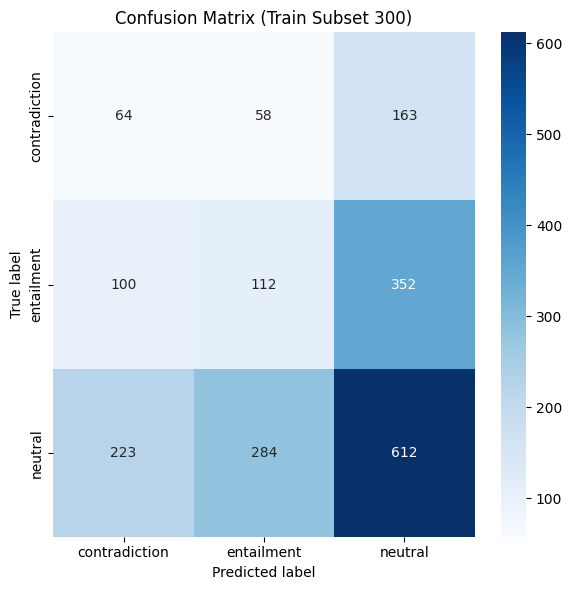


使用訓練資料數量: 1000 筆
Test Accuracy: 0.4492
Classification Report:
               precision    recall  f1-score   support

contradiction       0.19      0.22      0.20       285
   entailment       0.30      0.28      0.29       564
      neutral       0.59      0.60      0.59      1119

     accuracy                           0.45      1968
    macro avg       0.36      0.36      0.36      1968
 weighted avg       0.45      0.45      0.45      1968

Confusion Matrix:
[[ 62  80 143]
 [ 95 156 313]
 [174 279 666]]


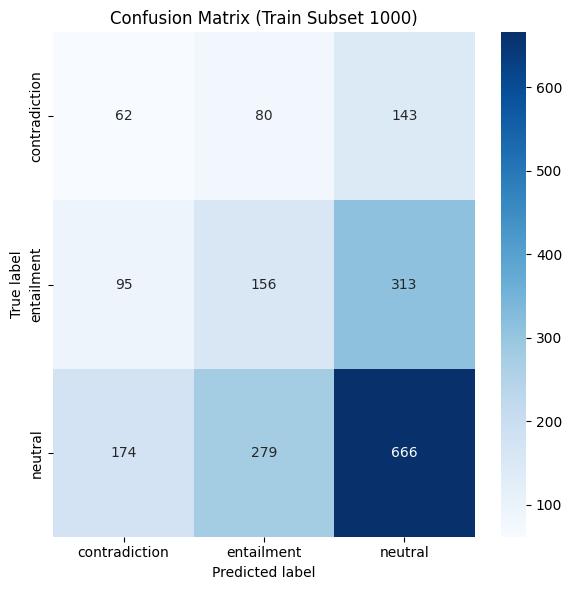


使用訓練資料數量: 7872 筆
Test Accuracy: 0.5173
Classification Report:
               precision    recall  f1-score   support

contradiction       0.19      0.18      0.18       285
   entailment       0.30      0.34      0.32       564
      neutral       0.73      0.69      0.71      1119

     accuracy                           0.52      1968
    macro avg       0.41      0.40      0.40      1968
 weighted avg       0.53      0.52      0.52      1968

Confusion Matrix:
[[ 50 174  61]
 [147 192 225]
 [ 64 279 776]]


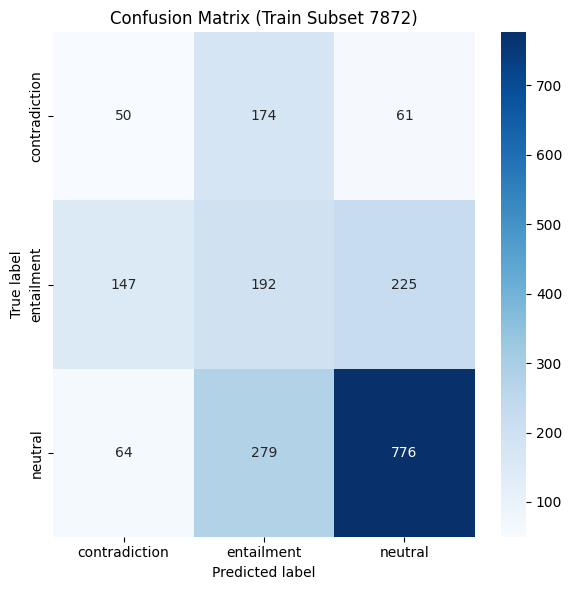

Accuracy Summary:
   train_samples  test_accuracy
0             20       0.425305
1             50       0.412602
2             70       0.427846
3            100       0.439533
4            300       0.400407
5           1000       0.449187
6           7872       0.517276


In [ ]:
accuracy_summary = []
sample_sizes = [20, 50, 70, 100, 300, 1000, len(train_df)]

for size in sample_sizes:
    print(f"\n使用訓練資料數量: {size} 筆")
    
    X_train = X_train_full[:size]
    y_train = y_train_full[:size]
    
    knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    # 在完整測試集上做預測
    y_pred = knn.predict(X_test)
    
    # 計算 accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    
    # 輸出分類報告
    target_names = ["contradiction", "entailment", "neutral"]
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
  
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    import seaborn as sns
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix (Train Subset {size})")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

    accuracy_summary.append({"train_samples": size, "test_accuracy": acc})

summary_df = pd.DataFrame(accuracy_summary)
print("Accuracy Summary:")
print(summary_df)
 

